# Engdahl Events CSV File Analysis: events, stations, rays  


##  Fei Zhang
### 2018-09-013

In this Jupyter Notebook, we analyze the ENGDAHL seismic events, stations, and rays



In [1]:
!which python

/g/data1a/ha3/fxz547/miniconda3/bin/python


In [2]:
!python -V

Python 3.6.4 :: Anaconda, Inc.


In [3]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

In [4]:
import sys
# get the pst packages into PYTHONPATH 
sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
from seismic.traveltime.sort_rays import sort,sort2

In [5]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile)   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #finalpdf =  pd.read_csv(csvfile,  sep='\s+', header=None,  names=col_names) # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]
    
    return in_pdf  #pandas_data_frame

In [6]:


# OR read in from already sorted (zoned) csv file
inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P.csv'
inputpdf = csv2pdf(inputcsv)

In [7]:
inputpdf.shape

(1818633, 18)

In [8]:
inputpdf.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,ARRIVAL_TIME,ORIGIN_TIME,ELLIPTICITY_CORR,locations2degrees,ARRIVAL_DISTANCE,station_code,SNR,P_or_S
0,0,-1,0.31,1188758329,166.201,-11.763,16300.0,146.2545,-20.0882,281.445714,2007-09-02T18:43:31.000240Z,2007-09-02T18:38:49.000340Z,-0.554187,20.883634,20.87,CTAO,0.0,1
1,0,-1,0.76,1188758329,166.201,-11.763,16300.0,148.7550,-26.4890,293.409266,2007-09-02T18:43:43.000800Z,2007-09-02T18:38:49.000340Z,-0.591194,22.051595,22.01,RMQ,0.0,1
2,0,-1,0.09,1188758329,166.201,-11.763,16300.0,144.3195,-18.1482,293.436102,2007-09-02T18:43:43.000800Z,2007-09-02T18:38:49.000340Z,-0.564358,22.062467,22.06,MTSU,0.0,1
3,0,-1,0.57,1188758329,166.201,-11.763,16300.0,151.6293,-30.4183,303.382362,2007-09-02T18:43:53.000870Z,2007-09-02T18:38:49.000340Z,-0.618168,23.029456,22.96,ARMA,0.0,1
4,0,-1,2.50,1188758329,166.201,-11.763,16300.0,145.6916,-31.5375,345.337986,2007-09-02T18:44:35.000850Z,2007-09-02T18:38:49.000340Z,-0.662524,27.359206,27.30,CMSA,0.0,1


In [9]:
inputpdf.columns


Index(['source_block', 'station_block', 'residual', 'event_number',
       'source_longitude', 'source_latitude', 'source_depth',
       'station_longitude', 'station_latitude', 'observed_tt', 'ARRIVAL_TIME',
       'ORIGIN_TIME', 'ELLIPTICITY_CORR', 'locations2degrees',
       'ARRIVAL_DISTANCE', 'station_code', 'SNR', 'P_or_S'],
      dtype='object')

In [10]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

In [11]:
# P wave
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/seismic_events_arrivals_P_0.csv'
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/tempworks/outfile_P.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out.csv'
inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv'
#inputcsv='/Softlab/travel_time_tomography/PST/CSV_New_FZ01-pst-cluster2_run3/P_out.csv'
residual_cutoff=5.0  # cutoff value for P is 5s
sortedfile='sortedfile_P.csv'
sortedfile2= 'sortedfile2_P.csv'



#S wave
#inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/run5_events_1deg/outfile_S.csv'
# inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/S_out.csv'
# residual_cutoff=10.0
# sortedfile='sortedfile_S.csv'
# sortedfile2= 'sortedfile2_S.csv'

sorted_pdf = sort(inputcsv,sortedfile,residual_cutoff)   # select the median travel time

#sort again should get identical rows. ALL reduced to a minimum set
#pdf2=sort2(sortedfile, sortedfile2, residual_cutoff )

In [12]:
stop

NameError: name 'stop' is not defined

In [13]:
pdf2= sorted_pdf


In [14]:
pdf2.shape

(380270, 16)

In [15]:
pdf2.source_block.nunique()  # number of unique values

4515

In [16]:
pdf2.station_block.nunique()

1087

In [17]:
pdf2.station_code.nunique()

3720

In [18]:
pdf2.groupby(['station_block','station_code']).count().shape

(3720, 14)

# Begin to Visualize the data

In [19]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

In [20]:
# plt.figure(); pdf2.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')

# plt.figure(); pdf2.plot.scatter(x='event_number', y='residual',figsize=(12,8))  # less than +-10s

In [21]:
# plt.figure(); pdf2.plot.scatter(x='event_number', y='source_block',figsize=(12,8))

In [22]:
# plt.figure(); pdf2.plot.scatter(x='source_block', y='station_block',figsize=(12,8))

# 1. Python Pandas package plot function (with basemap) 

<Figure size 432x288 with 0 Axes>

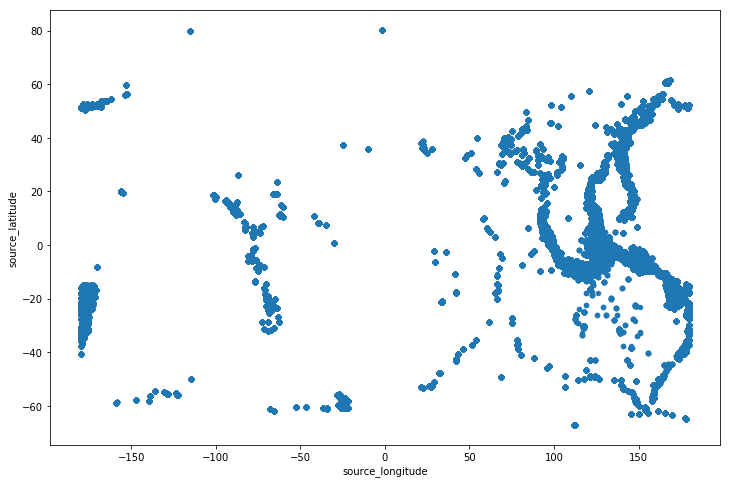

In [23]:
plt.figure(); pdf2.plot.scatter(x='source_longitude', y='source_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

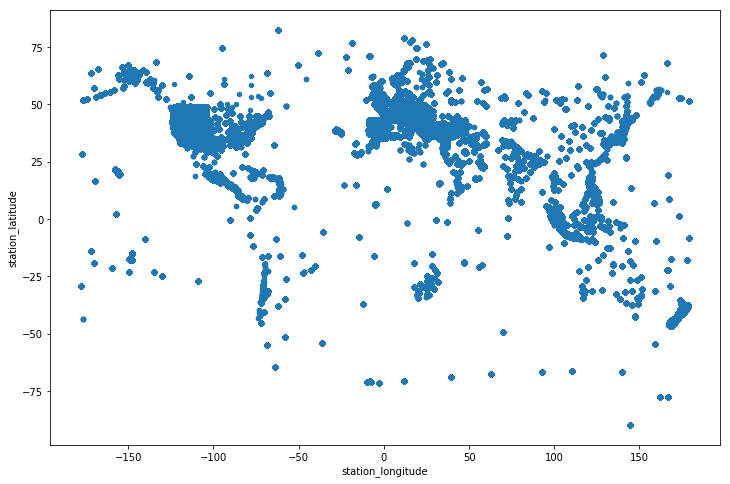

In [24]:
plt.figure(); pdf2.plot.scatter(x='station_longitude', y='station_latitude',figsize=(12,8))

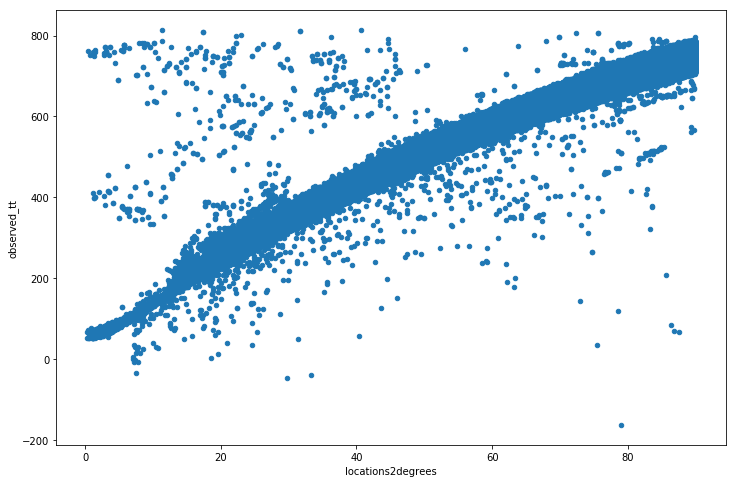

In [25]:
#plt.figure(); 
pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))


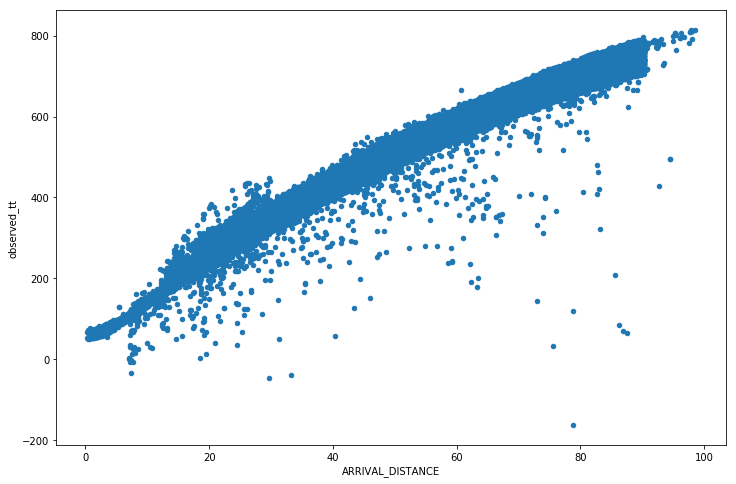

In [26]:
pdf2.plot.scatter(x='ARRIVAL_DISTANCE', y='observed_tt',figsize=(12,8))

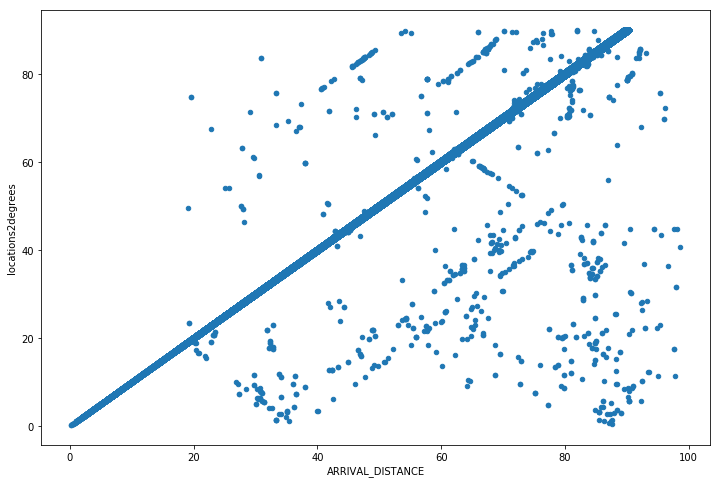

In [27]:
pdf2.plot.scatter(x='ARRIVAL_DISTANCE', y='locations2degrees',figsize=(12,8))

In [28]:
station_issues=pdf2[abs(pdf2['ARRIVAL_DISTANCE'] - pdf2['locations2degrees'])>1]

In [29]:
station_issues.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,ARRIVAL_TIME,ORIGIN_TIME,ELLIPTICITY_CORR,locations2degrees,ARRIVAL_DISTANCE,station_code,SNR,P_or_S
8139,0,-1,-0.11,1160932065,-156.049,19.891,5000.0,-85.7301,10.9009,430.653019,2006-10-15T17:14:56.000820Z,2006-10-15T17:07:45.000050Z,-0.347751,67.955927,37.06,MURC,0.0,1
8572,0,-1,-0.94,1160932065,-156.049,19.891,5000.0,-83.8240,9.7829,679.669300,2006-10-15T17:19:05.000900Z,2006-10-15T17:07:45.000050Z,-0.331551,70.080253,71.43,PAL,0.0,1
8573,0,-1,-0.96,1160932065,-156.049,19.891,5000.0,-83.8240,9.7829,679.669280,2006-10-15T17:19:05.000880Z,2006-10-15T17:07:45.000050Z,-0.331551,70.080253,71.43,PAL,0.0,1
15550,0,-1,1.04,1138049446,-77.776,6.870,23800.0,-83.8240,9.7829,403.779038,2006-01-23T20:57:30.000900Z,2006-01-23T20:50:46.000270Z,-0.221592,6.654871,34.17,PAL,0.0,1
15551,0,-1,0.92,1138049446,-77.776,6.870,23800.0,-83.8240,9.7829,403.778918,2006-01-23T20:57:30.000780Z,2006-01-23T20:50:46.000270Z,-0.221592,6.654871,34.17,PAL,0.0,1


In [30]:
station_issues.shape

(850, 18)

In [31]:
station_issues.station_code.unique()

array(['MURC', 'PAL', 'CHIE', 'PRA', 'RETA', 'TAM', 'SVST', 'EGUA',
       'VIMO', 'GLMI', 'YURE', 'MON', 'MPG', 'ALIB'], dtype=object)

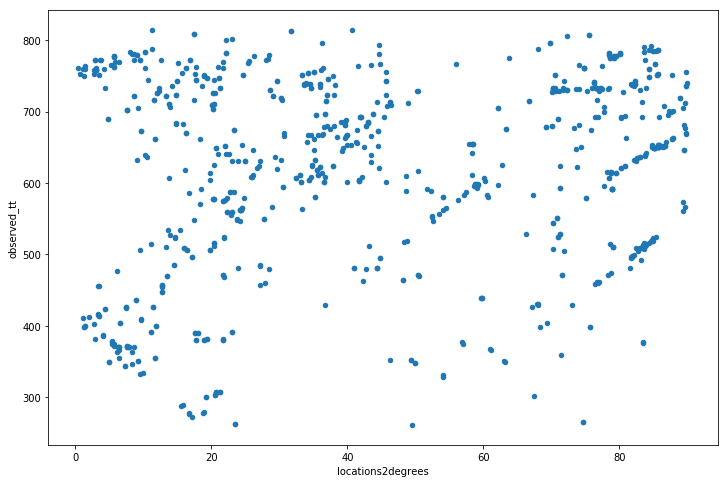

In [32]:
station_issues.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

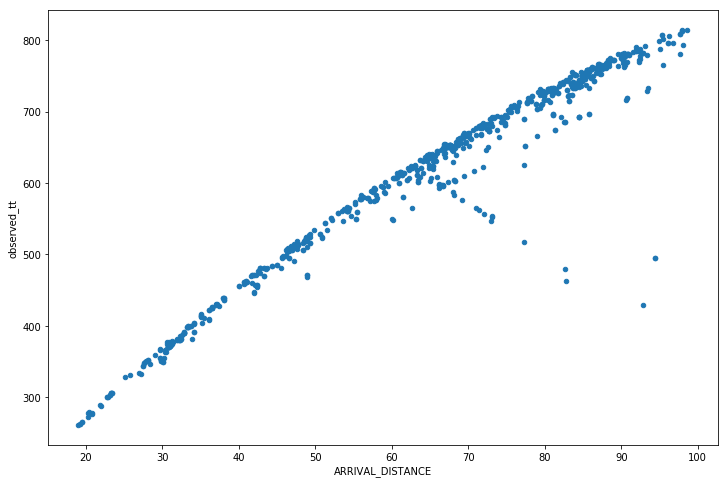

In [33]:
station_issues.plot.scatter(x='ARRIVAL_DISTANCE', y='observed_tt',figsize=(12,8))

In [35]:
# save csv file
#station_issues.drop(columns=['geometry']).to_csv("problem_stations",header=True, index=False, sep=',')

# 3. Geopandas and Maps

In [36]:
import geopandas as gpd

In [37]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [38]:
event_locations = [Point(xy) for xy in zip(pdf2.source_longitude, pdf2.source_latitude)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

In [39]:
# myax = geopdf.plot(figsize=[20,10])


# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude+
# title_str= "event locations"
# myax.set_title(title_str)

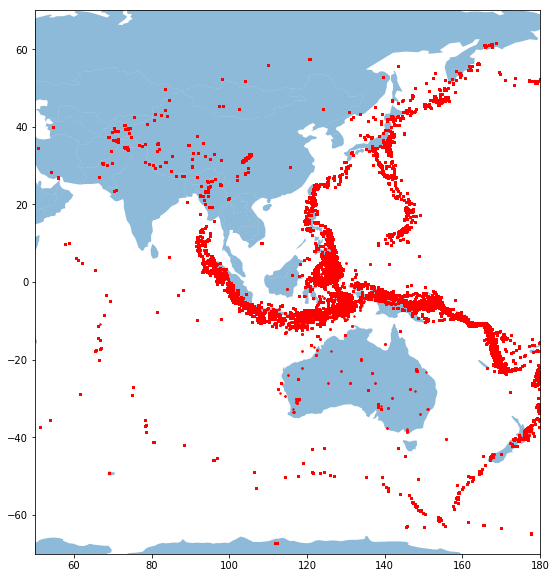

In [40]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [41]:
Stop here

SyntaxError: invalid syntax (<ipython-input-41-bc113f3dc93b>, line 1)

# Plot Arrival Rays

In [ ]:
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.source_longitude, x.source_latitude), 
                (x.station_longitude, x.station_latitude)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')

In [ ]:
# myax=geopdf_ray.plot(figsize=[20,10])

# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude')
# title_str= "event->station Rays"
# myax.set_title(title_str)

In [ ]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

# mymap.set_xlim([-180,180])
# mymap.set_ylim([-80,80])

mymap.set_xlim([50,180])
mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)

In [43]:
pdf3=pd.read_csv('/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out_translated.csv', header='infer')


In [44]:
pdf3.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,locations2degrees,station_code,SNR,P_or_S,source_xc,source_yc,source_zc,station_xc,station_yc,station_zc
0,555738,174393,2.986946,1438400325,154.2784,-25.4437,19.9579,128.0590,-30.7790,313.529507,23.674288,FORT,5.256926,1,154.375,-25.625,19.375,128.125,-30.875,1.25
1,555738,170895,-5.449775,1438400325,154.2784,-25.4437,19.9579,153.5115,-28.1617,44.488666,2.802841,GC1S,8.590258,1,154.375,-25.625,19.375,153.625,-28.375,1.25
2,555738,170535,-5.074421,1438400325,154.2784,-25.4437,19.9579,153.3958,-27.9122,41.236173,2.591385,GC2F,44.464834,1,154.375,-25.625,19.375,153.625,-28.125,1.25
3,555738,174074,5.470825,1438400325,154.2784,-25.4437,19.9579,138.2162,-30.4472,218.438131,15.028052,LCRK,6.715174,1,154.375,-25.625,19.375,138.375,-30.625,1.25
4,555738,173697,-2.296145,1438400325,154.2784,-25.4437,19.9579,134.0585,-30.2818,255.477280,18.489745,MULG,6.463297,1,154.375,-25.625,19.375,134.125,-30.375,1.25


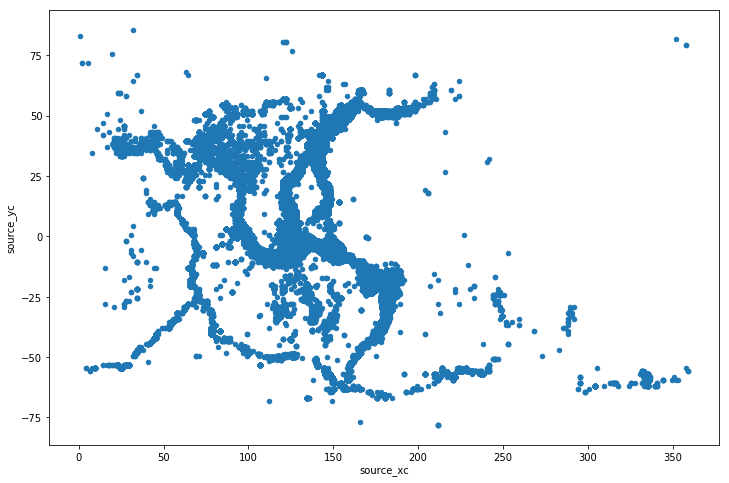

In [45]:
pdf3.plot.scatter(x='source_xc', y='source_yc', figsize=(12, 8))


In [52]:
pdf3.source_zc.unique().size

76

In [53]:
type(depth)

NoneType

# Other Things

In [ ]:
x=124.6; y=-0.0891; z=2353.8

In [ ]:
i=round(x/0.25)+1; print (i)

In [ ]:
print (i)

In [ ]:
j=round((90-y)/0.25) +1; print (j)